<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L06-Feed%20Forward%20Networks%20for%20Natural%20Language%20Processing/04_CNN_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 1: Terminology of CNN

Before diving into the practical implementation, it’s essential to understand the key terminologies that are fundamental to Convolutional Neural Networks.



#### 1. **Convolution**
   - **Definition**: A convolution is a mathematical operation that takes two inputs: an input matrix (e.g., an image or sequence) and a filter (also called a kernel). The filter slides over the input, performing an element-wise multiplication and summing the results to produce a feature map.
   - **In CNNs**: In a convolutional layer, filters are used to detect features such as edges, textures, or more complex patterns in the data. These filters slide over the input with a specific stride and produce feature maps that represent the presence of these patterns in different regions of the input.
   
   **1D Convolution Example**:
   - For 1D convolution, the filter slides over a 1D sequence (e.g., a time series or text data) and captures local dependencies between adjacent elements in the sequence.
   - **Formula**:

      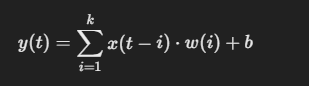
      
     Where `y(t)` is the output at position `t`, `x(t-i)` is the input value at position `t-i`, `w(i)` is the filter weight, and `b` is the bias term.



#### 2. **Kernel (Filter)**
   - **Definition**: A kernel (or filter) is a small matrix used to perform the convolution operation. For 1D convolutions, a kernel is a vector that is applied to a sliding window of the input sequence.
   - **In CNNs**: The kernel captures specific patterns in the input sequence. For example, in text processing, a kernel might detect important words or sequences of words.



#### 3. **Stride**
   - **Definition**: Stride refers to how much the filter moves across the input data in each step of the convolution.
   - **In CNNs**: A larger stride results in fewer overlaps between the regions that the filter covers, leading to a smaller output size. A stride of 1 means the filter moves one element at a time.



#### 4. **Padding**
   - **Definition**: Padding refers to adding extra elements (usually zeros) around the borders of the input sequence or matrix.
   - **In CNNs**: Padding ensures that the convolution operation does not reduce the size of the output too much. This is particularly useful when we want to preserve the size of the input data after the convolution.



#### 5. **Pooling**
   - **Definition**: Pooling is a down-sampling technique that reduces the spatial dimensions (for 2D data) or the length (for 1D data) of the feature maps.
   - **Types**:
     - **Max Pooling**: Takes the maximum value from each region of the feature map.
     - **Average Pooling**: Averages the values from each region.
   - **In CNNs**: Pooling is applied to reduce the size of the feature map, which helps to decrease computational costs and prevent overfitting.



#### 6. **Activation Function**
   - **Definition**: Activation functions introduce non-linearity to the network, allowing it to learn more complex patterns.
   - **In CNNs**: The most commonly used activation function is **ReLU (Rectified Linear Unit)**, which outputs the input value if it’s positive and zero otherwise.



#### 7. **Feature Map**
   - **Definition**: A feature map is the output of a convolutional layer, representing the detected features after the filter is applied to the input.
   - **In CNNs**: Multiple feature maps are generated by applying different filters, each detecting various patterns in the input.



#### 8. **Fully Connected Layer**
   - **Definition**: A fully connected (FC) layer connects every neuron from the previous layer to every neuron in the next layer.
   - **In CNNs**: FC layers are typically used at the end of the CNN to combine the features detected by convolutional and pooling layers and make predictions.

---



### Section 2: Understanding 1D Convolutions

**1D Convolutions** are used when the input data is sequential, such as time-series, audio data, or text. In contrast to 2D convolutions that operate on two-dimensional data (like images), **1D convolutions** slide a kernel across one dimension (e.g., time or sequence steps).



#### Why Use 1D Convolutions?

1. **Sequential Data**: 1D convolutions are particularly useful for data where the order of elements matters, such as:
   - Time-series (e.g., stock prices or sensor data).
   - Natural Language Processing (NLP) tasks, such as text classification or sentiment analysis.
   - Audio data, such as speech recognition.
   
2. **Efficient Local Feature Extraction**: By sliding a kernel over the sequence, 1D convolutions efficiently capture local patterns in the data. For example, a 1D convolution in a text sequence might detect the presence of specific word combinations or n-grams.



#### Example of 1D Convolution in PyTorch:



In [1]:
import torch
import torch.nn as nn

# Define a 1D convolutional layer
# - in_channels: Number of input channels (1 in this case)
# - out_channels: Number of output channels/filters (3 filters in this case)
# - kernel_size: Size of the convolution filter (3 in this case)
# - stride: Step size for sliding the filter (1 in this case)
# - padding: Number of zero-padding elements added to both sides of the input (1 in this case, to preserve input size)
conv1d_layer = nn.Conv1d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)

# Print details of the convolutional layer to understand its architecture
print("Conv1D Layer Details:")
print(f" - Input Channels: {conv1d_layer.in_channels}")
print(f" - Output Channels (Filters): {conv1d_layer.out_channels}")
print(f" - Kernel Size: {conv1d_layer.kernel_size}")
print(f" - Stride: {conv1d_layer.stride}")
print(f" - Padding: {conv1d_layer.padding}")
print(f" - Weight Shape: {conv1d_layer.weight.shape} (out_channels, in_channels, kernel_size)")
print(f" - Bias Shape: {conv1d_layer.bias.shape}\n")

# Create a sample 1D input tensor
# - Shape of input_data: (batch_size=1, in_channels=1, length=10)
# - batch_size = 1: Single sample in this batch
# - in_channels = 1: One channel (e.g., a single audio signal or time series)
# - length = 10: The length of the 1D input (e.g., 10 time steps in a time series)
input_data = torch.randn(1, 1, 10)

# Print the input details
print("Input Data Details:")
print(f" - Shape: {input_data.shape} (batch_size={input_data.shape[0]}, channels={input_data.shape[1]}, length={input_data.shape[2]})")
print(f" - Values:\n{input_data}\n")

# Apply the 1D convolution
output_data = conv1d_layer(input_data)

# Print the output details
print("Output Data Details after 1D Convolution:")
print(f" - Shape: {output_data.shape} (batch_size={output_data.shape[0]}, out_channels={output_data.shape[1]}, length={output_data.shape[2]})")
print(f" - Values:\n{output_data}\n")

# Explanation of the output shape:
# The output shape is determined by the convolution operation and depends on:
# - Input size
# - Filter size (kernel_size)
# - Stride (how much the filter moves at each step)
# - Padding (how much zero-padding is added to the input to control the output size)

# The **Conv1d** layer takes a 1D sequence and applies three filters (kernels) of size 3, resulting in an output of shape `(1, 3, 10)`. The stride of 1 and padding of 1 ensure that the output length remains the same as the input length.


Conv1D Layer Details:
 - Input Channels: 1
 - Output Channels (Filters): 3
 - Kernel Size: (3,)
 - Stride: (1,)
 - Padding: (1,)
 - Weight Shape: torch.Size([3, 1, 3]) (out_channels, in_channels, kernel_size)
 - Bias Shape: torch.Size([3])

Input Data Details:
 - Shape: torch.Size([1, 1, 10]) (batch_size=1, channels=1, length=10)
 - Values:
tensor([[[-1.2321,  1.1069,  2.3936, -0.5780,  0.1051,  0.1725, -2.4462,
          -0.7196, -0.5829,  2.4627]]])

Output Data Details after 1D Convolution:
 - Shape: torch.Size([1, 3, 10]) (batch_size=1, out_channels=3, length=10)
 - Values:
tensor([[[ 0.7723, -0.2456, -1.4338, -0.1986,  0.2529,  0.1783,  1.4993,
           1.2737,  0.5368, -1.0330],
         [-0.8062, -0.4079,  1.5984,  0.2241,  0.0353,  1.1050, -0.6754,
          -0.3637, -1.1107,  1.1556],
         [ 1.4265,  0.7982, -1.0312,  0.6513,  0.4323, -0.6116,  1.3293,
           0.6113,  1.6412, -0.7945]]], grad_fn=<ConvolutionBackward0>)




### Section 3: Components of a 1D CNN

Now, let’s explore the essential components of a 1D Convolutional Neural Network by building a simple 1D CNN in PyTorch. We’ll use these layers:
1. **1D Convolutional Layer**.
2. **Activation Function (ReLU)**.
3. **Pooling Layer** (Max Pooling).
4. **Fully Connected Layer**.



#### Step 1: 1D Convolutional Layer
A 1D convolutional layer will extract local patterns from the input sequence by sliding the kernel over the input.

**Demonstration**:


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple 1D Convolutional Neural Network (CNN) with one convolutional layer
class Simple1DCNN(nn.Module):
    def __init__(self):
        super(Simple1DCNN, self).__init__()

        # First convolutional layer
        # - in_channels=1: Input has 1 channel (e.g., a single time series or audio signal)
        # - out_channels=4: The layer will output 4 feature maps (using 4 convolutional filters)
        # - kernel_size=3: The size of the 1D convolution kernel is 3
        # - padding=1: Padding of 1 ensures that the input length is preserved after convolution
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)

        # Max pooling layer
        # - kernel_size=2: Reduces the length of the feature maps by half
        # - stride=2: Moves the pooling window by 2 steps, downsampling the feature maps
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Fully connected layer (linear layer)
        # - input features = 4 * 5 (since after max pooling, the length of each feature map is halved to 5)
        # - output features = 1: Single output, assuming it's a regression task or binary classification
        self.fc1 = nn.Linear(4 * 5, 1)

    def forward(self, x):
        # Apply the first convolutional layer, followed by ReLU activation and max pooling
        # Input shape: (batch_size, in_channels=1, length=10)
        # Output shape after conv1: (batch_size, out_channels=4, length=10)
        x = F.relu(self.conv1(x))
        print(f"After Conv1 + ReLU: {x.shape}")

        # Output shape after max pooling: (batch_size, out_channels=4, length=5)
        x = self.pool(x)
        print(f"After Max Pooling: {x.shape}")

        # Flatten the tensor for the fully connected layer
        # Output shape: (batch_size, 4 * 5), where 4 is the number of feature maps, and 5 is the reduced length
        x = x.view(-1, 4 * 5)
        print(f"After Flattening: {x.shape}")

        # Pass through the fully connected layer
        # Output shape: (batch_size, 1)
        x = self.fc1(x)
        print(f"After Fully Connected Layer: {x.shape}")

        return x

# Create an instance of the model
model = Simple1DCNN()

# Generate a random 1D input tensor
# Shape: (batch_size=1, channels=1, length=10)
input_data = torch.randn(1, 1, 10)

# Perform the forward pass through the model
output = model(input_data)

# Print the output shape after passing through the model
print(f"Final Output Shape: {output.shape}")


After Conv1 + ReLU: torch.Size([1, 4, 10])
After Max Pooling: torch.Size([1, 4, 5])
After Flattening: torch.Size([1, 20])
After Fully Connected Layer: torch.Size([1, 1])
Final Output Shape: torch.Size([1, 1])


##### Detailed Explanation:

1. **Architecture**:
   - The model consists of:
     - A **1D convolutional layer** (`conv1`): It takes 1 input channel (e.g., 1D time series), applies 4 filters of size 3, and outputs 4 feature maps. Padding of 1 ensures the output length matches the input.
     - A **max-pooling layer** (`pool`): This reduces the length of the feature maps by half (from 10 to 5 in this case).
     - A **fully connected layer** (`fc1`): After flattening the feature maps, the model uses a fully connected layer to output a single value (useful for regression or binary classification tasks).

2. **Forward Pass**:
   - **Convolution + ReLU Activation**: The input passes through the convolutional layer, followed by ReLU activation, which introduces non-linearity.
     - Input shape: `(batch_size=1, in_channels=1, length=10)`
     - Output shape after `conv1`: `(batch_size=1, out_channels=4, length=10)` because of the 4 filters, and padding preserves the length.
   - **Max Pooling**: After applying max pooling, the length is halved.
     - Output shape after max pooling: `(batch_size=1, out_channels=4, length=5)`.

3. **Flattening**:
   - The output is flattened to prepare it for the fully connected layer.
     - Flattened shape: `(batch_size=1, 4 * 5)`, where `4` is the number of filters (output channels) and `5` is the reduced length after pooling.
   
4. **Fully Connected Layer**:
   - The fully connected layer outputs a single value.
     - Output shape: `(batch_size=1, 1)`.



#### Step 2: Activation Function
The **ReLU activation** is applied after the convolution to introduce non-linearity.

**Demonstration**:


In [3]:

# Apply ReLU to the output of the convolution
conv_output = model.conv1(input_data)


relu_output = F.relu(conv_output)
print("Output after ReLU activation:\n", relu_output)

# ReLU zeroes out all negative values, allowing the model to focus on essential features of the input data.


Output after ReLU activation:
 tensor([[[0.0000, 0.0000, 0.0000, 0.1004, 0.4222, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6767, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.7493, 0.9256, 0.7444, 0.3106, 0.0000, 1.2430, 1.6322, 1.7780,
          1.3620, 1.0226],
         [0.5886, 0.7098, 0.2266, 0.0000, 0.0000, 1.4504, 1.8061, 0.0000,
          0.6995, 0.4260]]], grad_fn=<ReluBackward0>)



#### Step 3: Pooling Layer
Max Pooling is applied to reduce the length of the feature maps and focus on the most prominent features.

**Demonstration**:


In [4]:

# Apply max pooling to the ReLU output
pooled_output = model.pool(relu_output)
print("Output after max pooling:\n", pooled_output)
# Max pooling reduces the dimensionality of the feature map by taking the maximum value from non-overlapping regions of the feature map. This reduces computational complexity while retaining essential information.


Output after max pooling:
 tensor([[[0.0000, 0.1004, 0.4222, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.6767, 0.0000, 0.0000],
         [0.9256, 0.7444, 1.2430, 1.7780, 1.3620],
         [0.7098, 0.2266, 1.4504, 1.8061, 0.6995]]],
       grad_fn=<SqueezeBackward1>)



#### Step 4: Fully Connected Layer
Finally, the output from the pooled feature map is flattened and passed through a fully connected layer.

**Demonstration**:



In [5]:
# Flatten the pooled output and apply the fully connected layer
flattened = pooled_output.view(-1, 4 * 5)  # Assuming input length 10, after pooling it's 5
fc_output = model.fc1(flattened)
print("Output from the fully connected layer:\n", fc_output)


Output from the fully connected layer:
 tensor([[0.0499]], grad_fn=<AddmmBackward0>)



**Explanation**:
- The fully connected layer combines the features detected by the previous layers to produce the final output. In this case, the output is a single value, which could represent a prediction for a regression task.

---



### Section 4: Building a More Complex 1D CNN

In this section, we will build a more complex 1D CNN architecture that consists of multiple convolutional layers, activation functions, pooling layers, and fully connected layers. This architecture can be used for tasks like **time-series classification** or **text classification**.

**Demonstration**:


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a more complex 1D CNN architecture with two convolutional layers and two fully connected layers
class Complex1DCNN(nn.Module):
    def __init__(self):
        super(Complex1DCNN, self).__init__()

        # First 1D convolutional layer
        # - in_channels=1: Single input channel (e.g., a 1D time series)
        # - out_channels=16: 16 filters (neurons), each generating an output feature map
        # - kernel_size=3: Filter size of 3 (each filter spans 3 time steps)
        # - padding=1: Padding added to ensure output length matches input length
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

        # Second 1D convolutional layer
        # - in_channels=16: Takes the 16 output channels from the first layer
        # - out_channels=32: 32 filters (neurons)
        # - kernel_size=3: Filter size of 3
        # - padding=1: Ensures length remains the same after convolution
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Max pooling layer
        # - kernel_size=2: Reduces the size of the input by half (downsampling)
        # - stride=2: Pooling window moves 2 steps at a time
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Fully connected layers
        # - First fully connected layer
        # - Input size: 32 * 5 (32 channels, reduced length to 5 after pooling twice)
        # - Output size: 100 neurons
        self.fc1 = nn.Linear(32 * 5, 100)

        # Output layer
        # - Input size: 100 neurons from the previous fully connected layer
        # - Output size: 10 neurons (for classification into 10 classes)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        # Initial input dimensions
        print(f"Input Data:\n{x}")
        print(f" - Shape: {x.shape} (batch_size, channels, length)")

        # First convolution -> ReLU -> Max Pooling
        print(f"\nApplying Conv1: (in_channels={self.conv1.in_channels}, out_channels={self.conv1.out_channels}, kernel_size={self.conv1.kernel_size})")
        print(f" - Weight shape: {self.conv1.weight.shape} (out_channels, in_channels, kernel_size)")
        print(f" - Bias shape: {self.conv1.bias.shape} (out_channels)")
        x = self.conv1(x)
        print(f"Values after Conv1:\n{x}")
        print(f" - Output shape after Conv1: {x.shape} (batch_size, out_channels=16, length=20)")

        # ReLU activation after Conv1
        x = F.relu(x)
        print(f"Values after ReLU (Conv1):\n{x}")

        # Max pooling after Conv1
        x = self.pool(x)
        print(f"Values after Max Pooling (Conv1):\n{x}")
        print(f" - Output shape after Max Pooling (Conv1): {x.shape} (batch_size, out_channels=16, length=10)")

        # Second convolution -> ReLU -> Max Pooling
        print(f"\nApplying Conv2: (in_channels={self.conv2.in_channels}, out_channels={self.conv2.out_channels}, kernel_size={self.conv2.kernel_size})")
        print(f" - Weight shape: {self.conv2.weight.shape} (out_channels, in_channels, kernel_size)")
        print(f" - Bias shape: {self.conv2.bias.shape} (out_channels)")
        x = self.conv2(x)
        print(f"Values after Conv2:\n{x}")
        print(f" - Output shape after Conv2: {x.shape} (batch_size, out_channels=32, length=10)")

        # ReLU activation after Conv2
        x = F.relu(x)
        print(f"Values after ReLU (Conv2):\n{x}")

        # Max pooling after Conv2
        x = self.pool(x)
        print(f"Values after Max Pooling (Conv2):\n{x}")
        print(f" - Output shape after Max Pooling (Conv2): {x.shape} (batch_size, out_channels=32, length=5)")

        # Flatten the tensor before passing into fully connected layers
        print(f"\nFlattening the tensor for Fully Connected layers")
        x = x.view(-1, 32 * 5)
        print(f"Values after Flattening:\n{x}")
        print(f" - Shape after flattening: {x.shape} (batch_size, flattened size)")

        # Fully connected layer 1
        print(f"\nApplying FC1: (in_features={self.fc1.in_features}, out_features={self.fc1.out_features})")
        print(f" - Weight shape: {self.fc1.weight.shape} (out_features, in_features)")
        print(f" - Bias shape: {self.fc1.bias.shape} (out_features)")
        x = self.fc1(x)
        print(f"Values after FC1:\n{x}")
        print(f" - Output shape after FC1: {x.shape} (batch_size, neurons=100)")

        # ReLU activation after FC1
        x = F.relu(x)
        print(f"Values after ReLU (FC1):\n{x}")

        # Fully connected layer 2 (Output layer)
        print(f"\nApplying FC2 (Output Layer): (in_features={self.fc2.in_features}, out_features={self.fc2.out_features})")
        print(f" - Weight shape: {self.fc2.weight.shape} (out_features, in_features)")
        print(f" - Bias shape: {self.fc2.bias.shape} (out_features)")
        x = self.fc2(x)
        print(f"Values after FC2 (Output):\n{x}")
        print(f" - Output shape after FC2: {x.shape} (batch_size, neurons=10)")

        return x

# Create an instance of the complex CNN model
complex_model = Complex1DCNN()

# Generate a random 1D input tensor
input_data = torch.randn(1, 1, 20)
print(f"Input Data:\n{input_data}\n")

# Forward pass through the model
output = complex_model(input_data)

# Print the final output shape and values
print(f"\nFinal Output Shape: {output.shape}")
print(f"Final Output Values:\n{output}")


Input Data:
tensor([[[-0.1224, -1.2369, -0.4172, -0.2618,  0.4049, -1.7903, -0.5131,
          -0.1033, -0.5494,  0.2583,  0.0935, -1.0770,  0.3812,  0.6636,
          -0.6359, -1.3385, -0.5934,  0.1702,  0.2764,  0.8674]]])

Input Data:
tensor([[[-0.1224, -1.2369, -0.4172, -0.2618,  0.4049, -1.7903, -0.5131,
          -0.1033, -0.5494,  0.2583,  0.0935, -1.0770,  0.3812,  0.6636,
          -0.6359, -1.3385, -0.5934,  0.1702,  0.2764,  0.8674]]])
 - Shape: torch.Size([1, 1, 20]) (batch_size, channels, length)

Applying Conv1: (in_channels=1, out_channels=16, kernel_size=(3,))
 - Weight shape: torch.Size([16, 1, 3]) (out_channels, in_channels, kernel_size)
 - Bias shape: torch.Size([16]) (out_channels)
Values after Conv1:
tensor([[[ 0.3453,  0.0129,  0.1545, -0.1268,  0.5882, -0.0610,  0.1578,
           0.1908, -0.1397,  0.0270,  0.2860, -0.2431, -0.0811,  0.1845,
           0.2616,  0.1144,  0.0178, -0.0320, -0.2880,  0.0170],
         [-0.4925, -0.7661, -0.8851, -0.5989, -0.4579, -0.

##### Explanation:

1. **Architecture**:
   - The model consists of:
     - **2 convolutional layers**:
       - `conv1`: 1 input channel, 16 output feature maps (filters), kernel size 3, padding of 1.
       - `conv2`: 16 input feature maps, 32 output feature maps (filters), kernel size 3, padding of 1.
     - **Max pooling**: The pooling layer reduces the feature map length by half (from 20 → 10 → 5).
     - **2 fully connected layers**:
       - `fc1`: After flattening, the fully connected layer transforms the input to 100 units.
       - `fc2`: The final output layer maps to 10 units (for 10 classes, e.g., classification task).

2. **Forward Pass**:
   - **Conv1 + ReLU + Pooling**:
     - Input shape: `(batch_size=1, channels=1, length=20)`
     - Output after `conv1`: `(batch_size=1, out_channels=16, length=20)`
     - After max pooling: `(batch_size=1, out_channels=16, length=10)`
   - **Conv2 + ReLU + Pooling**:
     - Output after `conv2`: `(batch_size=1, out_channels=32, length=10)`
     - After max pooling: `(batch_size=1, out_channels=32, length=5)`
   - **Flattening**:
     - The output is reshaped to a flat tensor of size `(batch_size, 32 * 5)` to be passed into the fully connected layers.
   - **Fully Connected Layer 1 (fc1)**:
     - After passing through the first fully connected layer with ReLU, the output shape is `(batch_size, 100)`.
   - **Output Layer (fc2)**:
     - The final output has 10 units (for classification into 10 classes), with shape `(batch_size, 10)`.



### Section 5: Regularization in CNNs



#### Dropout

To prevent overfitting in deep CNNs, **dropout** is a commonly used regularization technique. Dropout randomly deactivates a portion of the neurons during training, forcing the network to learn redundant representations of the data.

**Demonstration**:


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a more complex 1D CNN architecture with two convolutional layers, dropout, and two fully connected layers
class Complex1DCNN(nn.Module):
    def __init__(self):
        super(Complex1DCNN, self).__init__()

        # First 1D convolutional layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

        # Second 1D convolutional layer
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Dropout layer to reduce overfitting (p=0.5 means 50% chance of dropping a neuron)
        self.dropout = nn.Dropout(p=0.5)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 5, 100)  # 32 channels with length reduced to 5
        self.fc2 = nn.Linear(100, 10)  # 10 output classes

    def forward(self, x):
        # Initial input dimensions
        print(f"Input Data:\n{x}")
        print(f" - Shape: {x.shape} (batch_size, channels, length)")

        # First convolution -> ReLU -> Max Pooling
        x = self.conv1(x)
        print(f"Values after Conv1:\n{x}")
        x = F.relu(x)
        x = self.pool(x)
        print(f"Values after Max Pooling (Conv1):\n{x}")
        print(f" - Output shape after Max Pooling (Conv1): {x.shape} (batch_size, out_channels=16, length=10)")

        # Second convolution -> ReLU -> Max Pooling
        x = self.conv2(x)
        print(f"Values after Conv2:\n{x}")
        x = F.relu(x)
        x = self.pool(x)
        print(f"Values after Max Pooling (Conv2):\n{x}")
        print(f" - Output shape after Max Pooling (Conv2): {x.shape} (batch_size, out_channels=32, length=5)")

        # Flatten the tensor before passing into fully connected layers
        print(f"\nFlattening the tensor for Fully Connected layers")
        x = x.view(-1, 32 * 5)
        print(f"Values after Flattening:\n{x}")
        print(f" - Shape after flattening: {x.shape} (batch_size, flattened size)")

        # Fully connected layer 1
        x = self.fc1(x)
        print(f"Values after FC1:\n{x}")
        x = F.relu(x)

        # Apply dropout after the first fully connected layer
        x = self.dropout(x)
        print(f"Values after Dropout:\n{x} (note: some neurons will have values set to zero)")

        # Fully connected layer 2 (Output layer)
        x = self.fc2(x)
        print(f"Values after FC2 (Output):\n{x}")
        print(f" - Output shape after FC2: {x.shape} (batch_size, neurons=10)")

        return x

# Create an instance of the complex CNN model with dropout
complex_model = Complex1DCNN()

# Generate a random 1D input tensor
input_data = torch.randn(1, 1, 20)
print(f"Input Data:\n{input_data}\n")

# Forward pass through the model
output = complex_model(input_data)

# Print the final output shape and values
print(f"\nFinal Output Shape: {output.shape}")
print(f"Final Output Values:\n{output}")


Input Data:
tensor([[[ 1.5091, -1.0224,  0.8826, -0.2454,  0.9845,  0.0733, -0.4648,
          -0.5518, -0.0188, -1.2759, -0.0076,  1.3832,  0.1292,  0.0409,
           1.4141,  0.2515, -1.5029,  1.2123,  0.0559,  1.4383]]])

Input Data:
tensor([[[ 1.5091, -1.0224,  0.8826, -0.2454,  0.9845,  0.0733, -0.4648,
          -0.5518, -0.0188, -1.2759, -0.0076,  1.3832,  0.1292,  0.0409,
           1.4141,  0.2515, -1.5029,  1.2123,  0.0559,  1.4383]]])
 - Shape: torch.Size([1, 1, 20]) (batch_size, channels, length)
Values after Conv1:
tensor([[[ 0.2020, -1.0325,  0.4979, -0.5932,  0.1778, -0.5461, -0.2661,
          -0.0595,  0.1132, -0.4108,  0.3896,  0.1604, -0.7147, -0.2103,
           0.1442, -0.6781, -0.5960,  0.7736, -0.6777,  0.1468],
         [ 0.6254,  0.4534, -0.0502,  0.4288,  0.3337,  0.5887, -0.0027,
          -0.2780, -0.1330, -0.3180, -0.4705,  0.5741,  0.7852,  0.1813,
           0.6057,  0.8479, -0.2777, -0.1591,  0.6762,  0.6219],
         [-1.0569,  0.1933,  0.0191,  0.171


**Explanation**:
- Dropout is applied before the fully connected layer to randomly deactivate 50% of the neurons during each forward pass. This helps the model generalize better to unseen data.
- see the difference in the output for values after dropout.

---
